In [ ]:
# Import des bibliothèques

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Import de données (via Kaggle : https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)
data = pd.read_csv('/content/top10s.csv', encoding='ISO-8859-1')

print(data.shape) # Dimension des données (nb ligne/col)
print(data.columns) # Noms des variables
data

(603, 15)
Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


Text(0, 0.5, 'Cout du modele (Inertia)')

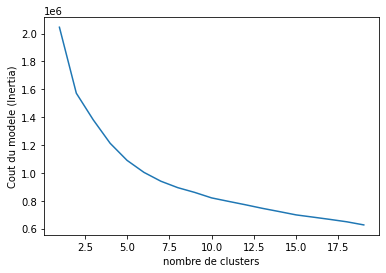

In [ ]:
# Étude du nombre de cluster via l'inertie (elbow curve)

X = data[['bpm', 'nrgy','dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']] # Variables de différenciation des musiques (bpm, rythme, ...) 

inertia = []

K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

In [ ]:
# Standardisation des données : transformation en loi normale
# z = (x - u) / s 

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [ ]:
# Clustering via KMeans

# nb_clust = len(data['top genre'].unique())
nb_clust = 3 # Après plusieurs essaies de clusters : choix de 3 clusters
model = KMeans(n_clusters=nb_clust)

model.fit(X)
pred = model.predict(X)
pred

array([2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,

In [ ]:
# Nuage de points, une couleur par cluster
model = PCA(n_components=2)
x_pca = model.fit_transform(X)

fig = px.scatter(data, x=x_pca[:,0], y=x_pca[:,1], color=pred, hover_name='top genre') # Visualisation via plotly
fig.show()

In [ ]:
# Analyse des similitudes des genres de musiques dans un même cluster
# La variable "Max cluster" correspond au cluster attribué aux genres de musiques

df = pd.DataFrame(columns=['Cluster','Genre','BPM','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness','Speechiness'])

for prediction, genre, bpm, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness in zip(pred,data['top genre'],data['bpm'],data['nrgy'],data['dnce'],data['dB'],data['live'],data['val'],data['dur'],data['acous'],data['spch']):
    df = df.append({'Cluster' : prediction,      
                    'Genre' : genre,
                    'BPM' : bpm,
                    'Energy' : energy,
                    'Danceability' : danceability,
                    'Loudness' : loudness,
                    'Liveness' : liveness,
                    'Valence' : valence,
                    'Length' : length,
                    'Acousticness' : acousticness,
                    'Speechiness' : speechiness}, ignore_index=True)
    
def max_genre(genre):
  return df['Cluster'][df['Genre'] == genre].value_counts().idxmax()
df['Max cluster'] = df.apply(lambda x : max_genre(x['Genre']), axis=1)

liste_cols = ['BPM','Energy','Danceability','Loudness','Liveness','Valence','Length', 'Acousticness','Speechiness']
for col in liste_cols:
  df[f'Moyenne {col}'] = 0
  for i in range(nb_clust):
    df[f'Moyenne {col}'][df['Max cluster'] == i] = df[col][df['Max cluster'] == i].mean()

df = df.drop_duplicates(subset=['Max cluster','Genre']).sort_values(by='Max cluster')
df.drop('Cluster', axis=1, inplace=True)
df.drop(liste_cols, axis=1, inplace=True)

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is tryi

,Genre,Max cluster,Moyenne BPM,Moyenne Energy,Moyenne Danceability,Moyenne Loudness,Moyenne Liveness,Moyenne Valence,Moyenne Length,Moyenne Acousticness,Moyenne Speechiness
0,neo mellow,0,108.000000,41.307692,51.769231,-8.384615,11.615385,31.538462,233.384615,57.384615,3.769231
273,irish singer-songwriter,0,108.000000,41.307692,51.769231,-8.384615,11.615385,31.538462,233.384615,57.384615,3.769231
220,folk-pop,0,108.000000,41.307692,51.769231,-8.384615,11.615385,31.538462,233.384615,57.384615,3.769231
207,alaska indie,0,108.000000,41.307692,51.769231,-8.384615,11.615385,31.538462,233.384615,57.384615,3.769231
588,alternative r&b,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020
252,australian dance,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020
240,electropop,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020
225,house,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020
339,hip hop,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020
372,danish pop,1,116.909091,65.676768,58.111111,-6.666667,15.393939,37.676768,238.363636,17.181818,8.202020


- Folk / Indie / Neo mellow	: calme, musique de fond, pas dansant, pas très joyeux, très acoustique, très peu de parole

- Pop / Rock / Latino : énergique, dansant, joyeux, pas très acoustique (electronique), fait pour le live, parole

- (Electro / House) / (hip-hop / rap / r&b) : énergique, moyennement dansant, joyeux ou triste, parole